In [3]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.preferences import *

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style('white')
#sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

## Load data from a specific simulation

In [9]:
s = "../results/2020-04-30_bed-intv/sim_bednets_0002/"

In [10]:
op = pd.read_csv(os.path.join(s, "op.csv"))
og = pd.read_csv(os.path.join(s, "og.csv"))
epoch_df = pd.read_csv(os.path.join(s, "epoch_df.csv"))
epoch_df.index = epoch_df.name

## Plot prevalence

In [11]:
savefig = False

In [13]:
epoch_df

,name,t0,t1,gen_rate,gens,x_h,x_v
name,,,,,,,
init,init,0.000000,53615.384615,265.764957,1.424909e+07,0.653846,0.075556
InitVar,InitVar,53615.384615,57265.384615,265.764957,9.700421e+05,0.653846,0.075556
Crash,Crash,57265.384615,73665.384615,163.446623,2.680525e+06,0.205882,0.016204
CrashVar,CrashVar,73665.384615,77315.384615,163.446623,5.965802e+05,0.205882,0.016204
Recovery,Recovery,77315.384615,130930.769231,265.764957,1.424909e+07,0.653846,0.075556


In [21]:
time_limits = (epoch_df.loc["InitVar", "t0"], epoch_df.loc["CrashVar", "t1"] + 3650) 

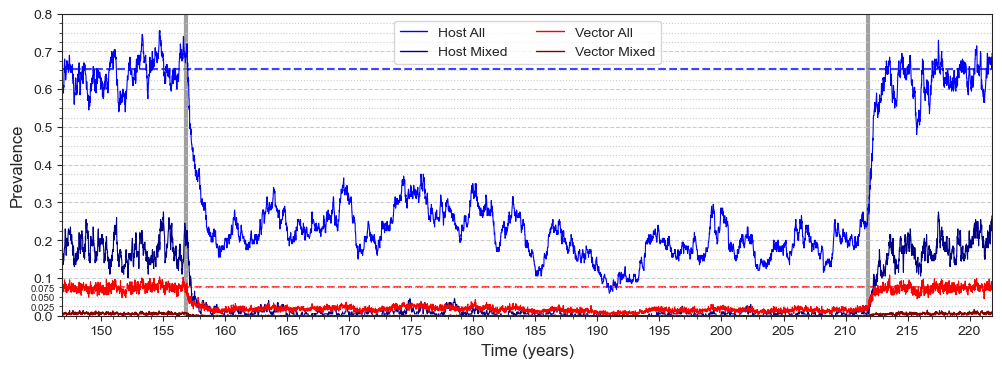

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.plot(op["t0"], op["HX"], color="blue", linewidth=0.8, label="Host All")
ax.plot(op["t0"], op["HmX"], color="darkblue", linewidth=0.8, label="Host Mixed")

# Vector Prevalence
ax.plot(op["t0"], op["VX"], color="red", linewidth=0.8, label="Vector All")
ax.plot(op["t0"], op["VmX"], color="darkred", linewidth=0.8, label="Vector Mixed")

# Delineate Equilibriums
ax.axhline(epoch_df.loc["init", "x_h"], 
           color="blue", linestyle='dashed', alpha=0.75,
           zorder=-1)
ax.axhline(epoch_df.loc["init", "x_v"], 
           color="red", linestyle='dashed', alpha=0.75,
           zorder=-1)


# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=-1)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=-1)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
if savefig:
    fig.savefig("../figs/equilibrate_prevalence_v1.pdf", bbox_inches="tight", pad_inches=0.5)

## Version 2

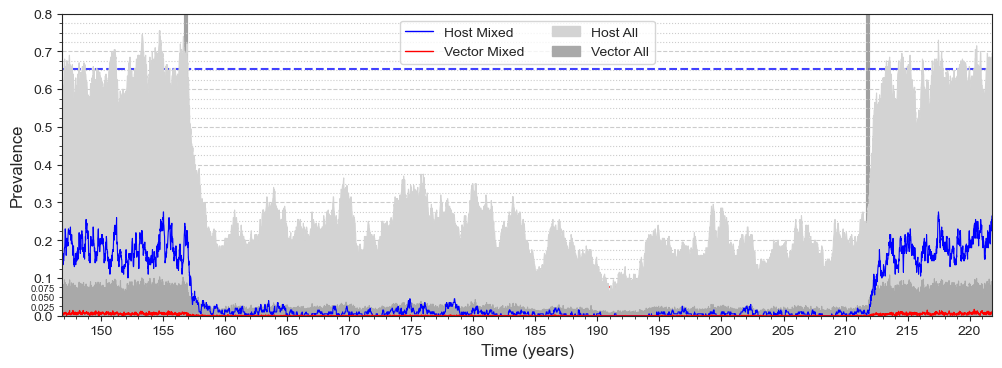

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")
ax.plot(op["t0"], op["HmX"], color="blue", linewidth=0.8, label="Host Mixed")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")
ax.plot(op["t0"], op["VmX"], color="red", linewidth=0.8, label="Vector Mixed")

# Delineate Equilibriums
ax.axhline(epoch_df.loc["init", "x_h"], 
           color="blue", linestyle='dashed', alpha=0.75,
           zorder=-1)
ax.axhline(epoch_df.loc["init", "x_v"], 
           color="red", linestyle='dashed', alpha=0.75,
           zorder=-1)


# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=-1)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=-1)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
if savefig:
    fig.savefig("../figs/equilibrate_prevalence_v1.pdf", bbox_inches="tight", pad_inches=0.5)

## Version 3

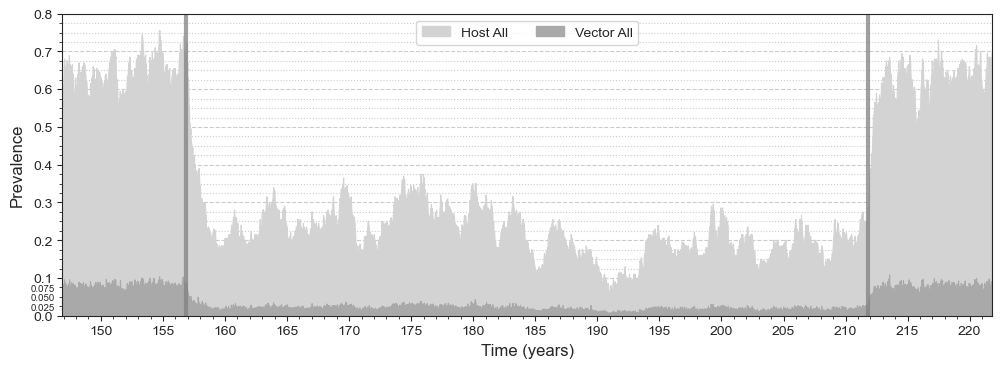

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")



# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
if savefig:
    fig.savefig("../figs/equilibrate_prevalence_v1.pdf", bbox_inches="tight", pad_inches=0.5)

## Add genetics

In [34]:
metrics = ["pi", "mean_k", "avg_l_ibd", "tajd"]
metric_cols = sns.color_palette("Set1", len(metrics))
m_dt = dict(zip(metrics, metric_cols))

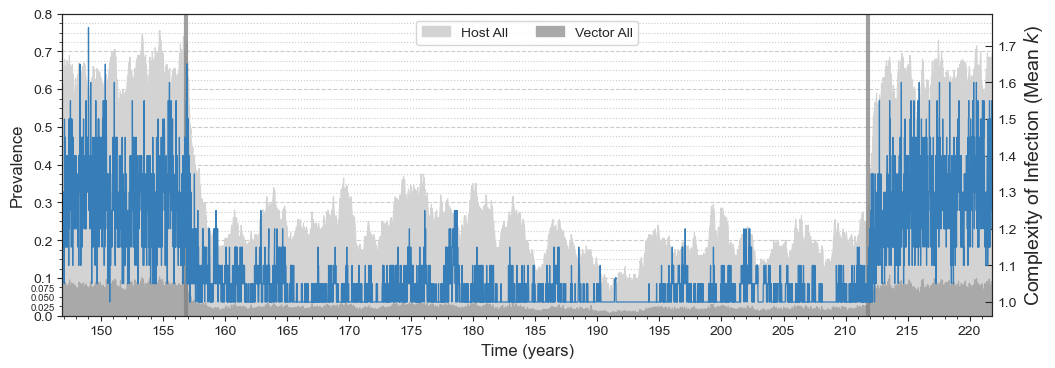

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")



# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
    
# Plot Genetic Diversity Lines
metric = "mean_k"
# Twin axis
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/equilibrate_prevalence_v1.pdf", bbox_inches="tight", pad_inches=0.5)

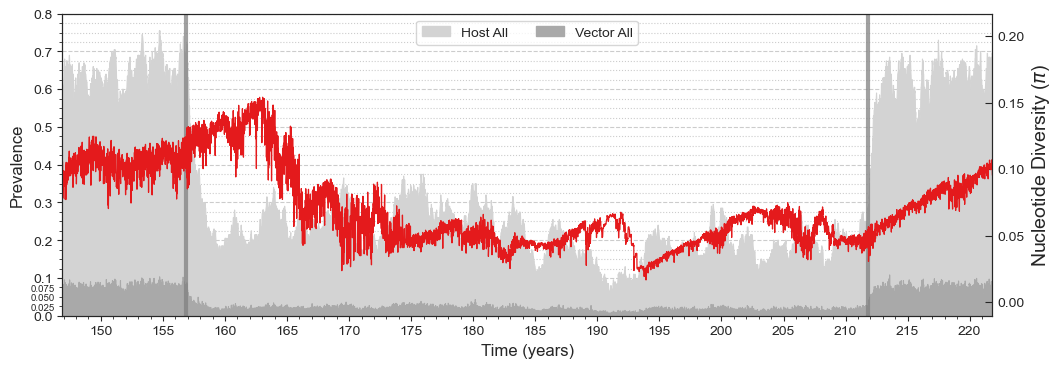

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")



# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
    
# Plot Genetic Diversity Lines
metric = "pi"
# Twin axis
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/equilibrate_prevalence_v1.pdf", bbox_inches="tight", pad_inches=0.5)

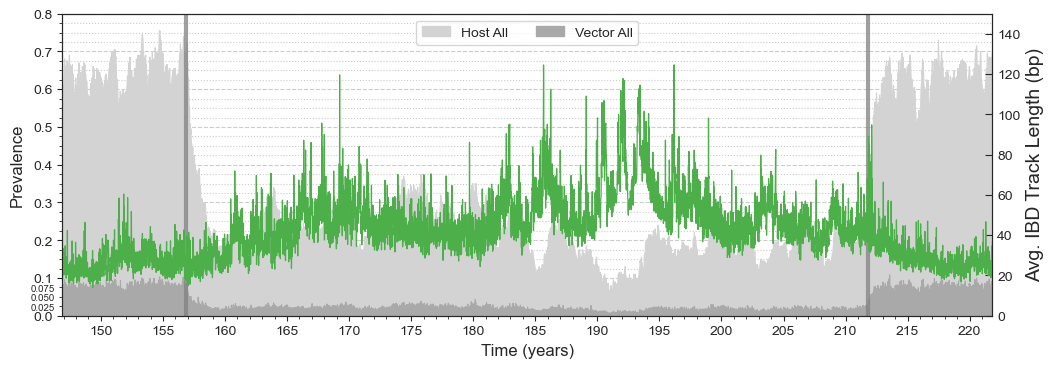

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")



# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
    
# Plot Genetic Diversity Lines
metric = "avg_l_ibd"
# Twin axis
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_ylim((0, 150))
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/equilibrate_prevalence_v1.pdf", bbox_inches="tight", pad_inches=0.5)